In [1]:
#importing required library
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [18]:
#reading in the data set
insurance = pd.read_csv('vehicle claim insurance data.csv')

In [19]:
insurance.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [20]:
#checking for definition of variables
VD = pd.read_csv("VariableDefinitions.csv")
VD.head(20)

,ID,Unique ID for the customer
0,Policy Start Date,Date policy started
1,Policy End Date,Date policy ended
2,Gender,Gender of the customer
3,Age,Age of the customer
4,ProductName,Name of Insurance policy
5,First Transaction Date,First date payment was made
6,No_Pol,Number of policies the customer has
7,Car_Category,Type of car
8,Subject_Car_Colour,Car colour
9,Subject_Car_Make,Car make


In [22]:
#Inspecting the dataset 
#checking the dimension, description and data information

insurance.describe()


,Age,No_Pol,target
count,12079.000000,12079.000000,12079.000000
mean,42.234539,1.307227,0.120457
std,97.492565,0.733085,0.325509
min,-6099.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000
50%,41.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000
max,320.000000,10.000000,1.000000


In [23]:
#checking for number of missing values
insurance.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     359
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Colour        6962
Subject_Car_Make          2476
LGA_Name                  6476
State                     6488
ProductName                  0
target                       0
dtype: int64

#### Dealing with Missing Values in the Age Column.

In [24]:
insurance["Age"].unique()

array([   30,    79,    43,     2,    20,    37,    40,    71,    58,
          45,    51,   120,    38,    81,    69,    31,    70,    34,
           1,    41,    47,    36,    46,    48,    39,    63,    42,
          27,    64,    50,    53,    33,    23,    32,    59,    60,
          52,    54,    44,    11,    78,    28,    29,    57,    12,
          65,    35,    73,    56,    55,    26,    49,    18,    14,
          62,    25,    61,    72,    82,    67,     7,    10,    68,
          21,    76,    24,    66,     3,    93,    22,    77,    19,
          80,     9,     6,   -76,    -2,    89,    74,    75,    84,
          16,    90,   140,     8,     5,    13,    86,    15,   320,
         -12,    83,    85, -6099, -5939,     4,   -22,   144,   112,
          17,     0,    88,   -27,    87,   133,   102,   -51,   128,
         -26,   100], dtype=int64)

In [25]:

#There appears to be negative values in the mean column which shouldnt be.
#Dealing with negative values in the age by replacing all ages of 0 and below with the mean

insurance["Age"][insurance["Age"]<=0]= 0 
#first replace all negative numbers with zero so their values do not affect the mean



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
mean =insurance["Age"].sum()/insurance["Age"].count() #finding the mean
mean

43.7546154482987

In [27]:
mean_new = round(mean) #rounding up the mean age to a whole number
mean_new

44.0

In [29]:
insurance["Age"] = insurance['Age'].replace(0, mean_new) # replacing all zeros with the mean as age cannot also be zero

In [30]:
insurance.describe()

,Age,No_Pol,target
count,12079.000000,12079.000000,12079.000000
mean,43.820184,1.307227,0.120457
std,21.188126,0.733085,0.325509
min,1.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000
50%,41.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000
max,320.000000,10.000000,1.000000


In [31]:
insurance["Age"].unique() #inspecting the age column to ensure there are no missing values and negative numbers.

array([ 30,  79,  43,   2,  20,  37,  40,  71,  58,  45,  51, 120,  38,
        81,  69,  31,  70,  34,   1,  41,  47,  36,  46,  48,  39,  63,
        42,  27,  64,  50,  53,  33,  23,  32,  59,  60,  52,  54,  44,
        11,  78,  28,  29,  57,  12,  65,  35,  73,  56,  55,  26,  49,
        18,  14,  62,  25,  61,  72,  82,  67,   7,  10,  68,  21,  76,
        24,  66,   3,  93,  22,  77,  19,  80,   9,   6,  89,  74,  75,
        84,  16,  90, 140,   8,   5,  13,  86,  15, 320,  83,  85,   4,
       144, 112,  17,  88,  87, 133, 102, 128, 100], dtype=int64)

#### Dealing with Missing Values in the Gender Column

In [32]:
#Dealing with missing values in the Gender column
insurance['Gender'].unique()


array(['Male', 'Female', 'Entity', 'Joint Gender', nan, 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

In [33]:
#replacing the unspecified gender as missing values.
insurance["Gender"] = insurance["Gender"].replace('Entity', np.nan)
insurance["Gender"] = insurance["Gender"].replace('NO GENDER', np.nan)
insurance["Gender"] = insurance["Gender"].replace('NOT STATED', np.nan)
insurance["Gender"] = insurance["Gender"].replace('SEX', np.nan)

In [34]:
insurance['Gender'].unique() #Checking to confirm changes

array(['Male', 'Female', nan, 'Joint Gender'], dtype=object)

In [35]:
#replacing the missing values with the 'most frequent' using simple imputter method

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values = np.nan, strategy = "most_frequent") #setting the imputer

imp.fit(insurance["Gender"].values.reshape(-1,1)) #fitting on the imputer

insurance["Gender"]=imp.transform(insurance["Gender"]. values.reshape(-1,1)) #transform/replace


In [36]:
insurance['Gender'].isna

<bound method Series.isna of 0          Male
1        Female
2          Male
3          Male
4          Male
          ...  
12074    Female
12075    Female
12076      Male
12077      Male
12078    Female
Name: Gender, Length: 12079, dtype: object>

#### Dealing with Missing Values in the Car Category

In [37]:
#Checking for unique values in the car-category column.
insurance['Car_Category'].unique()

array(['Saloon', 'JEEP', nan, 'Motorcycle', 'Truck', 'Bus', 'Mini Bus',
       'Pick Up', 'Mini Van', 'Van', 'Pick Up > 3 Tons', 'CAMRY CAR HIRE',
       'Wagon', 'Shape Of Vehicle Chasis', 'Sedan', 'Station 4 Wheel',
       'Tipper Truck'], dtype=object)

In [38]:
imp = SimpleImputer(missing_values = np.nan, strategy = "most_frequent") #setting the imputer

imp.fit(insurance["Car_Category"].values.reshape(-1,1)) #fitting on the imputer

insurance["Car_Category"]=imp.transform(insurance["Car_Category"]. values.reshape(-1,1)) #transform/replace

In [39]:
#Replacing missing values in Subject_Car_Colour with most frequent

imp = SimpleImputer(missing_values = np.nan, strategy = "most_frequent") #setting the imputer

imp.fit(insurance["Subject_Car_Colour"].values.reshape(-1,1)) #fitting on the imputer

insurance["Subject_Car_Colour"]=imp.transform(insurance["Subject_Car_Colour"]. values.reshape(-1,1)) #transform/replace

In [40]:
#Replacing missing values in Subject_Car_Make with most frequent

imp = SimpleImputer(missing_values = np.nan, strategy = "most_frequent") #setting the imputer

imp.fit(insurance["Subject_Car_Make"].values.reshape(-1,1)) #fitting on the imputer

insurance["Subject_Car_Make"]=imp.transform(insurance["Subject_Car_Make"]. values.reshape(-1,1)) #transform/replace

In [22]:
#Replacing missing values in 'State' with most frequent

imp = SimpleImputer(missing_values = np.nan, strategy = "most_frequent") #setting the imputer

imp.fit(insurance["State"].values.reshape(-1,1)) #fitting on the imputer

insurance["State"]=imp.transform(insurance["State"]. values.reshape(-1,1)) #transform/replace

In [41]:
#Replacing missing values in LGA with most frequent

imp = SimpleImputer(missing_values = np.nan, strategy = "most_frequent") #setting the imputer

imp.fit(insurance["LGA_Name"].values.reshape(-1,1)) #fitting on the imputer

insurance["LGA_Name"]=imp.transform(insurance["LGA_Name"]. values.reshape(-1,1)) #transform/replace

In [42]:
#checking to confirm there are no missing values
insurance.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                       0
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category                 0
Subject_Car_Colour           0
Subject_Car_Make             0
LGA_Name                     0
State                     6488
ProductName                  0
target                       0
dtype: int64

In [43]:
insurance.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Victoria Island,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Victoria Island,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Victoria Island,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Saloon,Black,TOYOTA,Victoria Island,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Male,20,2010-08-29,3,Saloon,Black,TOYOTA,Lagos,Lagos,Muuve,1


In [26]:
insurance.dtypes #Checking the data types of the variables

ID                        object
Policy Start Date         object
Policy End Date           object
Gender                    object
Age                        int64
First Transaction Date    object
No_Pol                     int64
Car_Category              object
Subject_Car_Colour        object
Subject_Car_Make          object
LGA_Name                  object
State                     object
ProductName               object
target                     int64
dtype: object

In [47]:
#Changing the Policy start date, Policy end date and first transaction date from object to datetime data type

insurance['Policy Start Date'] =  pd.to_datetime(insurance['Policy Start Date'])
insurance['Policy End Date'] =  pd.to_datetime(insurance['Policy End Date'])
insurance['First Transaction Date'] = pd.to_datetime(insurance['First Transaction Date'])

In [48]:
insurance.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Victoria Island,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Victoria Island,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Victoria Island,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Saloon,Black,TOYOTA,Victoria Island,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Male,20,2010-08-29,3,Saloon,Black,TOYOTA,Lagos,Lagos,Muuve,1


In [49]:
insurance.dtypes #Confirming that the data types are what they should be.

ID                                object
Policy Start Date         datetime64[ns]
Policy End Date           datetime64[ns]
Gender                            object
Age                                int64
First Transaction Date    datetime64[ns]
No_Pol                             int64
Car_Category                      object
Subject_Car_Colour                object
Subject_Car_Make                  object
LGA_Name                          object
State                             object
ProductName                       object
target                             int64
dtype: object

In [50]:
#Making a copy of the dataframe for later visualizations

insurance_copy = insurance.copy()

In [51]:
insurance.drop(["ID"], axis = 1)

,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Victoria Island,NaN,Car Classic,0
1,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Victoria Island,NaN,Car Classic,1
2,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Victoria Island,NaN,Car Classic,0
3,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Saloon,Black,TOYOTA,Victoria Island,NaN,CarSafe,0
4,2010-08-29,2010-12-31,Male,20,2010-08-29,3,Saloon,Black,TOYOTA,Lagos,Lagos,Muuve,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,2010-05-25,2011-05-24,Female,30,2010-05-25,1,Saloon,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1
12075,2010-10-03,2011-10-02,Female,59,2010-10-03,1,Saloon,Black,TOYOTA,Victoria Island,NaN,Car Classic,0
12076,2010-10-10,2011-10-08,Male,34,2010-10-10,1,Saloon,Black,TOYOTA,Victoria Island,NaN,CarSafe,0
12077,2010-02-27,2011-02-26,Male,120,2010-02-27,2,Saloon,White,TOYOTA,Victoria Island,Lagos,CVTP,0


In [34]:
insurance['Policy Start Month'] = insurance['Policy Start Date'].dt.month

In [35]:
insurance.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Policy Start Month
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic,0,5
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Victoria Island,Lagos,Car Classic,1,11
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Victoria Island,Lagos,Car Classic,0,3
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,CarSafe,0,8
4,00BRP63,2010-08-29,2010-12-31,Male,20,2010-08-29,3,Saloon,Black,TOYOTA,Lagos,Lagos,Muuve,1,8


In [52]:
#Reordering the columns to ensure the outcome is on the last column
column_names = ["ID","Policy Start Date","Policy End Date", "Policy Start Month","Gender","Age", "First Transaction Date", "No_Pol", "Car_Category", "Subject_Car_Colour", "Subject_Car_Make", "LGA_Name", "State", "ProductName", "target"]
insurance = insurance.reindex(columns = column_names)

In [53]:
insurance.head()

,ID,Policy Start Date,Policy End Date,Policy Start Month,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,NaN,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Victoria Island,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,NaN,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Victoria Island,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,NaN,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Victoria Island,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,NaN,Male,2,2010-08-21,1,Saloon,Black,TOYOTA,Victoria Island,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,NaN,Male,20,2010-08-29,3,Saloon,Black,TOYOTA,Lagos,Lagos,Muuve,1


In [54]:
insurance.drop('Subject_Car_Make', axis = 1, inplace = True)
insurance.drop('Subject_Car_Colour', axis = 1, inplace = True)
insurance.drop('Car_Category', axis = 1, inplace = True)
insurance.drop('ID', axis = 1, inplace = True)
insurance.drop ('First Transaction Date',axis = 1, inplace = True)
insurance.drop('LGA_Name', axis = 1, inplace = True)

In [55]:
insurance.head()

,Policy Start Date,Policy End Date,Policy Start Month,Gender,Age,No_Pol,State,ProductName,target
0,2010-05-14,2011-05-13,NaN,Male,30,1,NaN,Car Classic,0
1,2010-11-29,2011-11-28,NaN,Female,79,1,NaN,Car Classic,1
2,2010-03-21,2011-03-20,NaN,Male,43,1,NaN,Car Classic,0
3,2010-08-21,2011-08-20,NaN,Male,2,1,NaN,CarSafe,0
4,2010-08-29,2010-12-31,NaN,Male,20,3,Lagos,Muuve,1


In [56]:
insurance['Policy Period'] = abs(insurance ['Policy End Date'] - insurance['Policy Start Date'])

In [41]:
insurance.head()

,Policy Start Date,Policy End Date,Policy Start Month,Gender,Age,No_Pol,State,ProductName,target,Policy Period
0,2010-05-14,2011-05-13,5,Male,30,1,Lagos,Car Classic,0,364 days
1,2010-11-29,2011-11-28,11,Female,79,1,Lagos,Car Classic,1,364 days
2,2010-03-21,2011-03-20,3,Male,43,1,Lagos,Car Classic,0,364 days
3,2010-08-21,2011-08-20,8,Male,2,1,Lagos,CarSafe,0,364 days
4,2010-08-29,2010-12-31,8,Male,20,3,Lagos,Muuve,1,124 days


In [57]:
#Reordering the columns to ensure the outcome is on the last column
column_names = ["Policy Start Date","Policy End Date","Policy Period","Policy Start Month","Gender","Age", "No_Pol", "ProductName", "target"]
insurance = insurance.reindex(columns = column_names)

In [58]:
#converting the duration of the policy (Policy Period) to int type.
insurance['Policy Period'] = insurance['Policy Period'].dt.days.astype('int64')

In [59]:
insurance.head()

,Policy Start Date,Policy End Date,Policy Period,Policy Start Month,Gender,Age,No_Pol,ProductName,target
0,2010-05-14,2011-05-13,364,NaN,Male,30,1,Car Classic,0
1,2010-11-29,2011-11-28,364,NaN,Female,79,1,Car Classic,1
2,2010-03-21,2011-03-20,364,NaN,Male,43,1,Car Classic,0
3,2010-08-21,2011-08-20,364,NaN,Male,2,1,CarSafe,0
4,2010-08-29,2010-12-31,124,NaN,Male,20,3,Muuve,1


In [60]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Policy Start Date   12079 non-null  datetime64[ns]
 1   Policy End Date     12079 non-null  datetime64[ns]
 2   Policy Period       12079 non-null  int64         
 3   Policy Start Month  0 non-null      float64       
 4   Gender              12079 non-null  object        
 5   Age                 12079 non-null  int64         
 6   No_Pol              12079 non-null  int64         
 7   ProductName         12079 non-null  object        
 8   target              12079 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 849.4+ KB


In [61]:
#checking for definition of variables
VD = pd.read_csv("VariableDefinitions.csv")
VD.head(20)

,ID,Unique ID for the customer
0,Policy Start Date,Date policy started
1,Policy End Date,Date policy ended
2,Gender,Gender of the customer
3,Age,Age of the customer
4,ProductName,Name of Insurance policy
5,First Transaction Date,First date payment was made
6,No_Pol,Number of policies the customer has
7,Car_Category,Type of car
8,Subject_Car_Colour,Car colour
9,Subject_Car_Make,Car make


#### Visualizing Relationships

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF1F4702C8>,
      dtype=object)

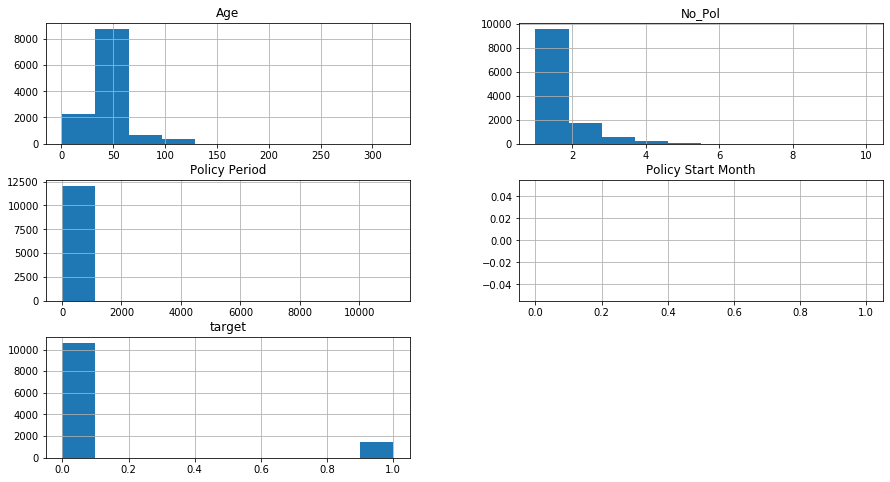

In [62]:
insurance.hist(figsize = (15,8))

######  The Histogram above shows that majority of people requesting for vehicle insurance claim have their ages close to 50 years old.

###### Most of the insurance policies usually start towards the end of the year or around the beginning of the year

###### The data also shows that a claim is very likely to be rejected than accepted

###### Also, Majority of the claim applicants have had at least one policy with the institution previously

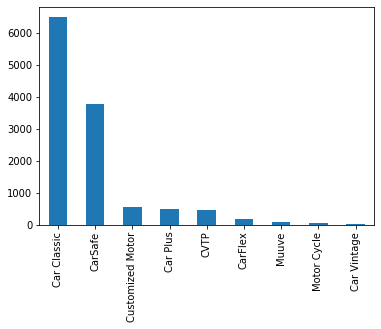

In [63]:
#visualizing the different insurance products
insurance['ProductName'].value_counts().plot.bar()

##### The bar chart above shows that Car classic is the Car insurance product with the most claims, followed by the CarSafe

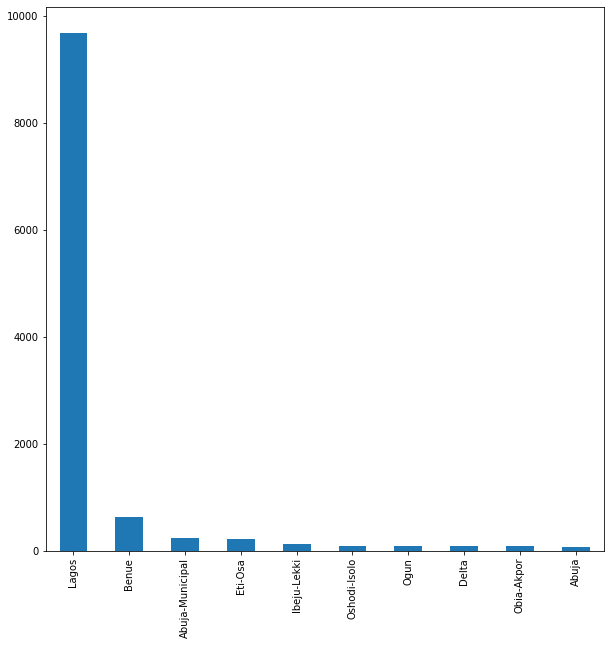

In [49]:
#visualizing the states column shows that majority of the policies were bought in Lagos state.
insurance_copy['State'].value_counts().head(10).plot.bar(figsize = (10,10))

In [64]:
# Dropping the product name, policy start and end date and policy start month columns
insurance.drop('Policy Start Date', axis = 1, inplace = True)
insurance.drop('Policy End Date', axis = 1, inplace = True)
insurance.drop('Policy Start Month', axis = 1, inplace = True)
insurance.drop('ProductName', axis = 1, inplace = True)
insurance.head(10)

,Policy Period,Gender,Age,No_Pol,target
0,364,Male,30,1,0
1,364,Female,79,1,1
2,364,Male,43,1,0
3,364,Male,2,1,0
4,124,Male,20,3,1
5,364,Male,37,2,0
6,364,Female,40,3,0
7,364,Male,43,1,0
8,364,Female,71,2,0
9,364,Female,58,1,0


In [65]:
replace_dict = {"Gender": {"Male":1, "Female":0, "Joint Gender": 2}}

print(replace_dict)

insurance = insurance.replace(replace_dict)

{'Gender': {'Male': 1, 'Female': 0, 'Joint Gender': 2}}


In [66]:
insurance.head()

,Policy Period,Gender,Age,No_Pol,target
0,364,1,30,1,0
1,364,0,79,1,1
2,364,1,43,1,0
3,364,1,2,1,0
4,124,1,20,3,1


In [67]:
insurance.corr()

,Policy Period,Gender,Age,No_Pol,target
Policy Period,1.000000,-0.001562,0.000549,-0.019347,-0.022750
Gender,-0.001562,1.000000,0.040772,0.043919,0.020193
Age,0.000549,0.040772,1.000000,0.111039,-0.016343
No_Pol,-0.019347,0.043919,0.111039,1.000000,0.074245
target,-0.022750,0.020193,-0.016343,0.074245,1.000000


In [68]:
from sklearn.preprocessing import StandardScaler
cols_to_norm = ["Policy Period", "Gender", "Age", "No_Pol"]
insurance[cols_to_norm] = StandardScaler().fit_transform(insurance[cols_to_norm])

In [69]:
insurance.head(10)

,Policy Period,Gender,Age,No_Pol,target
0,0.067252,0.538337,-0.652288,-0.419106,0
1,0.067252,-1.556565,1.660424,-0.419106,1
2,0.067252,0.538337,-0.038711,-0.419106,0
3,0.067252,0.538337,-1.973837,-0.419106,0
4,-1.050361,0.538337,-1.124270,2.309204,1
5,0.067252,0.538337,-0.321900,0.945049,0
6,0.067252,-1.556565,-0.180306,2.309204,0
7,0.067252,0.538337,-0.038711,-0.419106,0
8,0.067252,-1.556565,1.282838,0.945049,0
9,0.067252,-1.556565,0.669262,-0.419106,0


##### DataSet is ready for Machine Learning